<a href="https://colab.research.google.com/github/rahul15197/Toxic-Comment-Classification/blob/master/toxic_comment_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import string
from keras.layers import Dense, Dropout, Input, Embedding, CuDNNLSTM
from keras.preprocessing.text import Tokenizer
from keras.models import Model

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [0]:
import warnings
warnings.simplefilter('ignore')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

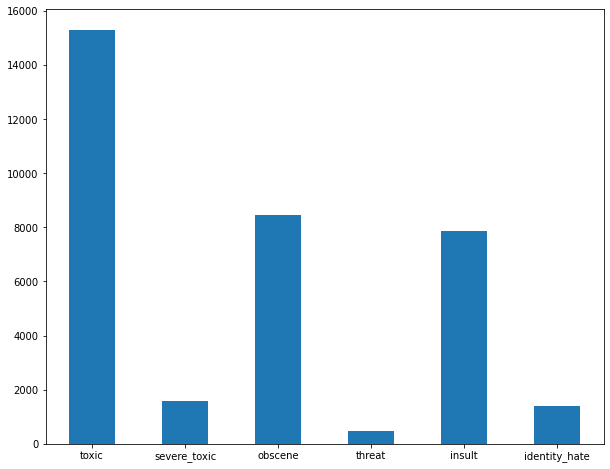

In [4]:
punctuations = set(string.punctuation)
stop_words = set(stopwords.words('english'))
toxic_comments = pd.read_csv("/content/drive/My Drive/Python Project data/Toxic Comment Classification data/train.csv")
comments_text = toxic_comments['comment_text'].dropna()
comments_text = [comment.lower() for comment in comments_text]
comment_labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
# analysis of dataset
toxicity_analysis = toxic_comments[comment_labels]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
toxicity_analysis.sum(axis=0).plot.bar()
plt.xticks(rotation='horizontal')

In [0]:
def preprocess_comments(text):
    c_text = re.sub('[^a-zA-Z]', ' ', text)
    c_text = re.sub(r'\s+[a-zA-Z]\s+', '', c_text)
    c_text = ' '.join([i for i in c_text.split() if i not in stop_words])
    return c_text

In [0]:
comments = list(comments_text)
comments_cleaned = []
for comment in comments:
    comments_cleaned.append(preprocess_comments(comment))
comments_labels = toxic_comments[comment_labels].values
X_train, X_test, y_train, y_test = train_test_split(comments_cleaned, comments_labels, test_size=0.20, random_state=42)

In [0]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab = len(tokenizer.word_index) + 1

X_train = pad_sequences(X_train, padding='post', maxlen=200)
X_test = pad_sequences(X_test, padding='post', maxlen=200)

In [8]:
inputs = Input(shape=(200,))
embedding_layer = Embedding(vocab, 20, input_length=200)(inputs)
x = CuDNNLSTM(128)(embedding_layer)
x = Dense(6, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 20)           6768800   
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 128)               76800     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 774       
Total params: 6,846,374
Trainable params: 6,846,374
Non-trainable params: 0
_________________________________________________________________
None


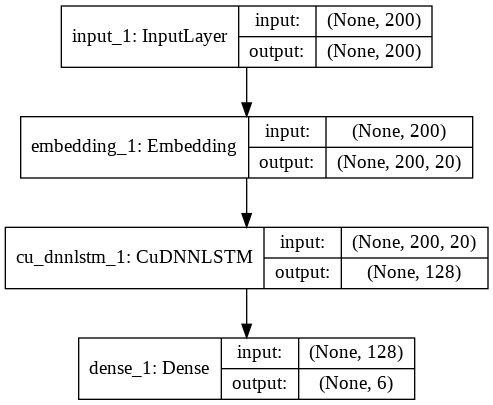

In [9]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [12]:
model_history = model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)


Train on 102124 samples, validate on 25532 samples
Epoch 1/5
102124/102124 [==============================] - 22s 217us/step - loss: 0.1465 - acc: 0.9633 - val_loss: 0.1424 - val_acc: 0.9630
Epoch 2/5
102124/102124 [==============================] - 15s 145us/step - loss: 0.1406 - acc: 0.9636 - val_loss: 0.1423 - val_acc: 0.9631
Epoch 3/5
102124/102124 [==============================] - 15s 148us/step - loss: 0.1396 - acc: 0.9639 - val_loss: 0.1425 - val_acc: 0.9632
Epoch 4/5
102124/102124 [==============================] - 15s 150us/step - loss: 0.1388 - acc: 0.9640 - val_loss: 0.1422 - val_acc: 0.9634
Epoch 5/5
102124/102124 [==============================] - 16s 152us/step - loss: 0.1380 - acc: 0.9642 - val_loss: 0.1406 - val_acc: 0.9635


In [13]:
accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Accuracy on test set: {accuracy[1] * 100} %")

31915/31915 [==============================] - 5s 147us/step
Accuracy on test set: 96.35803401890396 %


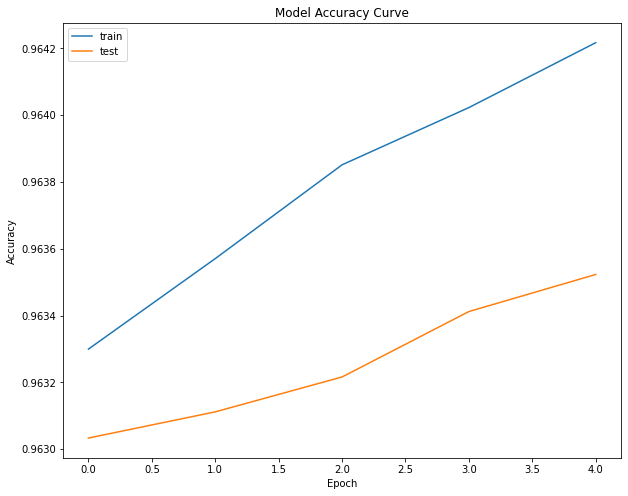

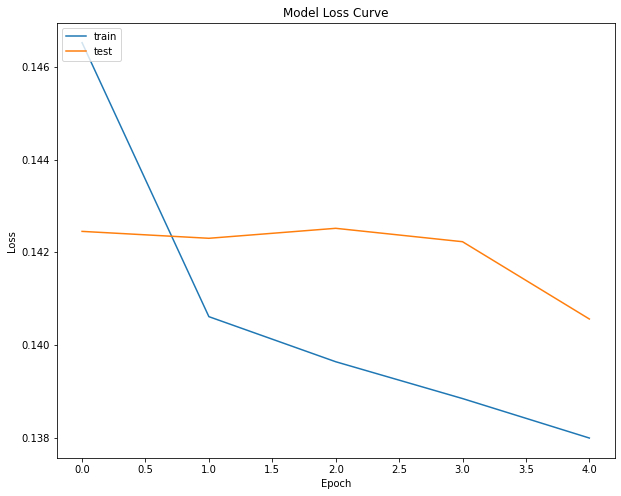

In [14]:
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])

plt.title("Model Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('Model Loss Curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()